In [1]:
from preprocess.kepler_io import *
from utils.functions import *
import matplotlib.pyplot as plt 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
plt.tight_layout()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
csv_filename = f"C:/Users/User/dev/data/{csv_name}"
csv_clean = 'C:/Users/User/dev/data/q1_q17_dr24_tce_clean.csv'
img_dir = "C:/Users/User/Desktop/images"

In [6]:
df = pd.read_csv(csv_filename, comment='#')
df.head()

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1162345,2,NaN,0.831850,0.000067,132.227,0.035197,0.92600,1.471,2.392,21.0000,6.092,2.636,2.950,0.5099,0.7944,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
1,1292087,2,NaN,1.095240,0.000010,132.133,0.002685,0.25630,13.310,2.122,0.4755,34.530,4.427,10.600,0.8916,0.6361,2310.0,661.0,NaN,NaN,6328.0,207.0,4.15,0.29,1.502,0.852,UNK
2,1293031,2,NaN,0.719273,0.000014,132.227,0.002786,0.70000,1.103,1.521,0.3183,29.680,5.248,8.302,1.4550,0.4296,3330.0,703.0,NaN,NaN,6363.0,214.0,3.80,0.35,2.489,1.036,UNK
3,1162345,3,NaN,0.831833,0.000009,131.919,0.002209,0.09536,51.770,2.181,1.2110,27.100,3.550,11.950,0.9062,0.8488,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
4,1164109,1,NaN,622.408000,0.008547,162.256,0.009840,0.00319,2193.000,12.010,1.8430,161.300,59.080,3.719,2.1140,2.5990,302.0,75.0,NaN,NaN,6609.0,200.0,4.11,0.28,1.654,0.816,UNK


In [7]:
kepids = get_kepler_ids_from_csv()

Text(0, 0.5, 'Normalized Flux')

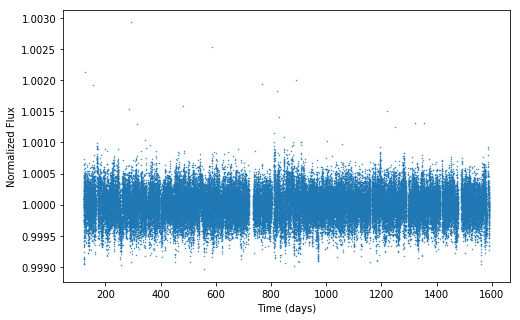

In [8]:
time, flux = get_time_flux_by_ID(1162345)
plt.figure(figsize=(8, 5))
plt.plot(time, flux, '.', ms=0.9)
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
# plt.savefig(os.path.join(img_dir,'1164109_time_flux.png'), dpi=200)

In [9]:
df[df['kepid']==1162345]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1162345,2,NaN,0.831850,0.000067,132.227,0.035197,0.92600,1.4710,2.392,21.000,6.092,2.636,2.950,0.5099,0.7944,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
3,1162345,3,NaN,0.831833,0.000009,131.919,0.002209,0.09536,51.7700,2.181,1.211,27.100,3.550,11.950,0.9062,0.8488,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
22,1162345,1,NaN,0.831777,0.000011,131.698,0.002556,0.87440,0.3894,2.349,1.751,24.270,3.455,8.812,0.9762,0.2497,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP


In [14]:
kepid = 1162345

In [10]:
get_time_flux_by_ID(1162345)

(array([ 120.53929492,  120.55972958,  120.58016413, ..., 1590.96062382,
        1590.98105837, 1591.00149312]),
 array([1.0000863 , 1.0000625 , 0.9998122 , ..., 1.0002509 , 0.99975115,
        0.9997362 ], dtype=float32))

In [11]:
period_list = [0.831850, 0.831833,0.831777 ]
t0_list = [132.227, 131.919, 131.698]
duration_list = np.array([2.392, 2.181, 2.349]) / 24

f1, t1 = remove_points_other_tce(time, flux,0.831850, period_list, t0_list, duration_list)

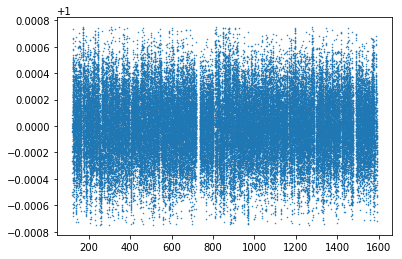

In [12]:
plt.plot(*sigma_clip(time, flux), '.', ms=1.0)

In [17]:
pc, non = get_binned_normalized_flux_by_IDs(kepid, overwrite=True)

why 1162345
 100.00%

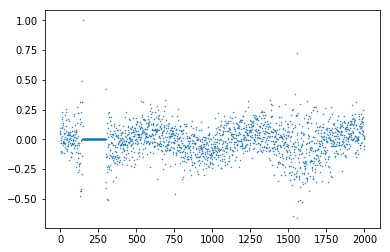

In [279]:
plt.plot(non[0], '.', ms=1.0)

In [110]:
kepid = 4390912

In [116]:
df[df['kepid'] == 1162345]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1162345,2,NaN,0.831850,0.000067,132.227,0.035197,0.92600,1.4710,2.392,21.000,6.092,2.636,2.950,0.5099,0.7944,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
3,1162345,3,NaN,0.831833,0.000009,131.919,0.002209,0.09536,51.7700,2.181,1.211,27.100,3.550,11.950,0.9062,0.8488,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
22,1162345,1,NaN,0.831777,0.000011,131.698,0.002556,0.87440,0.3894,2.349,1.751,24.270,3.455,8.812,0.9762,0.2497,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
